In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Load data
df = pd.read_csv('BankChurners.csv')  # upload data to Colab
df.head()
df.info()

# 1. Checking for missing values
df.isnull().sum()

# 2. Statistical Summary
display(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
# 3. Drop Unnecessary Columns
# We drop CLIENTNUM (ID) and the weird Naive_Bayes columns (Data Leakage)

c_drop = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df = df.drop(columns = c_drop)

# 4. Create a binary flag for correlation analysis
# 'Attrited Customer' becomes 1, 'Existing Customer' becomes 0
df['Churn_Binary'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Ensure numerics are numeric
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# 5. Final cleaned dataset info

display(df.columns)
display(df.dtypes)
print("Data Cleaned. Ready for Analysis.")

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn_Binary'],
      dtype='object')

,0
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64
Total_Relationship_Count,int64


Data Cleaned. Ready for Analysis.


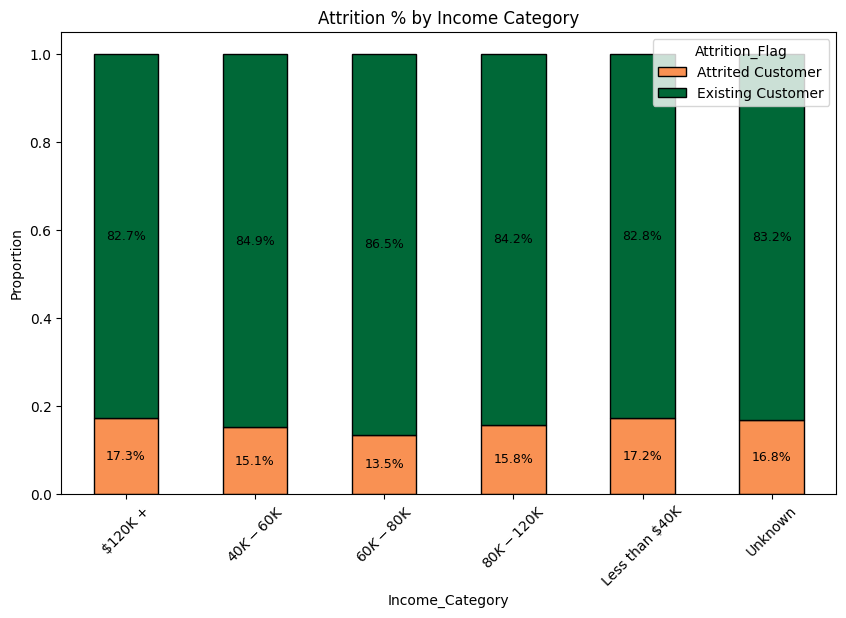

In [ ]:
## EDA Visualizations
# 1. Churn Rate by Income Category (Stacked Bar)

ct = df.groupby(['Income_Category','Attrition_Flag']).size().unstack()
pct = ct.div(ct.sum(axis=1), axis=0)

#pct.plot(kind='bar', stacked=True, color= ["#12436D","#2073BC"] , figsize=(10,6))
ax = pct.plot(kind='bar', stacked=True, color= ["#f99153","#006837"] ,
              figsize=(10,6), edgecolor='black', linewidth=1) # orange green
plt.title('Attrition % by Income Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# to show % inside bar
for container in ax.containers:
    for patch in container.patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x()
        y = patch.get_y()

        if height > 0.01: # Only annotate if the segment is large enough to display text
            percentage = f'{height:.1%}'
            ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center',
                    color='black', fontsize=9)
plt.show()

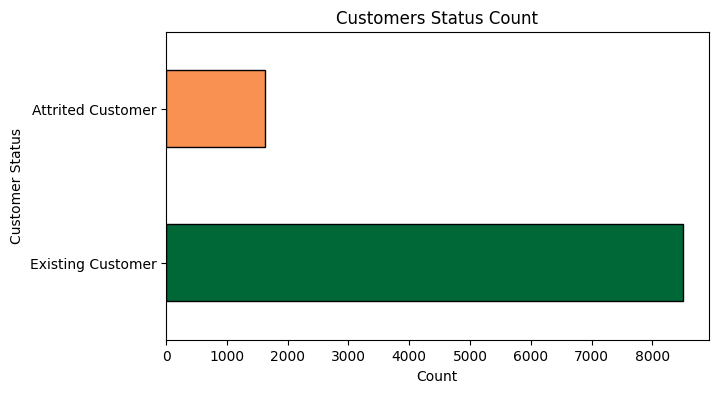

In [ ]:
# 2. count of customer

counts = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(7,4))
counts.plot(kind='barh', color= ["#006837","#f99153"], edgecolor='black', linewidth=1)
plt.title('Customers Status Count')
plt.xlabel('Count')
plt.ylabel('Customer Status')
plt.yticks([0,1], ['Existing Customer', 'Attrited Customer'])


plt.show()


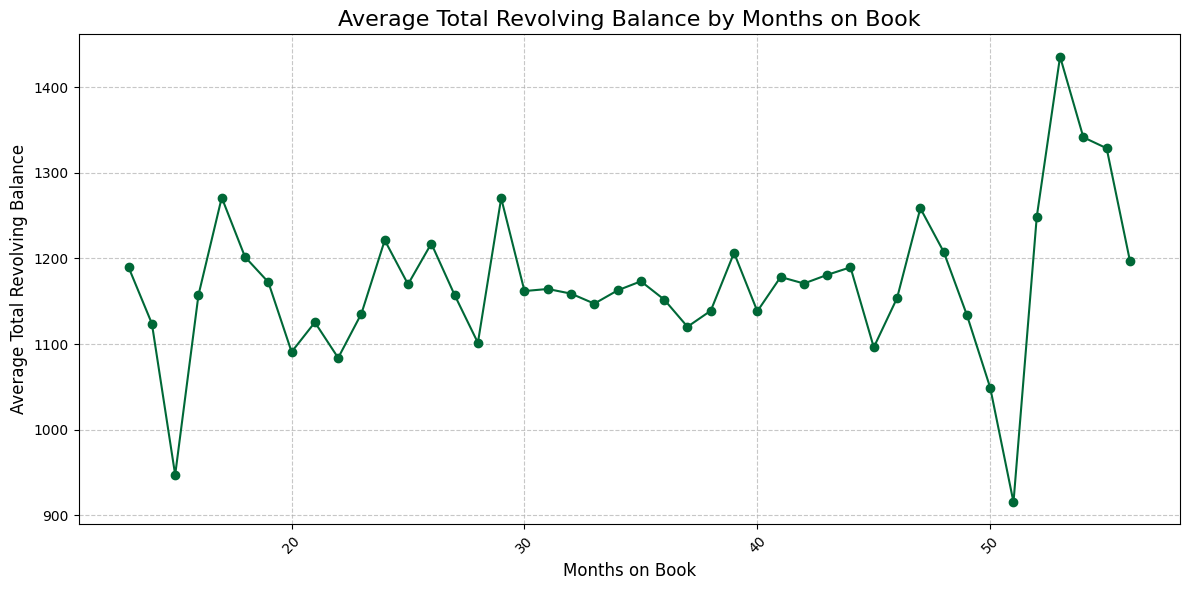

In [ ]:

# Calculate the average total revolving balance per months on book
avg_revolving_bal_by_tenure = df.groupby('Months_on_book')['Total_Revolving_Bal'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_revolving_bal_by_tenure['Months_on_book'], avg_revolving_bal_by_tenure['Total_Revolving_Bal'], marker='o', color='#006837')
plt.title('Average Total Revolving Balance by Months on Book', fontsize=16)
plt.xlabel('Months on Book', fontsize=12)
plt.ylabel('Average Total Revolving Balance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

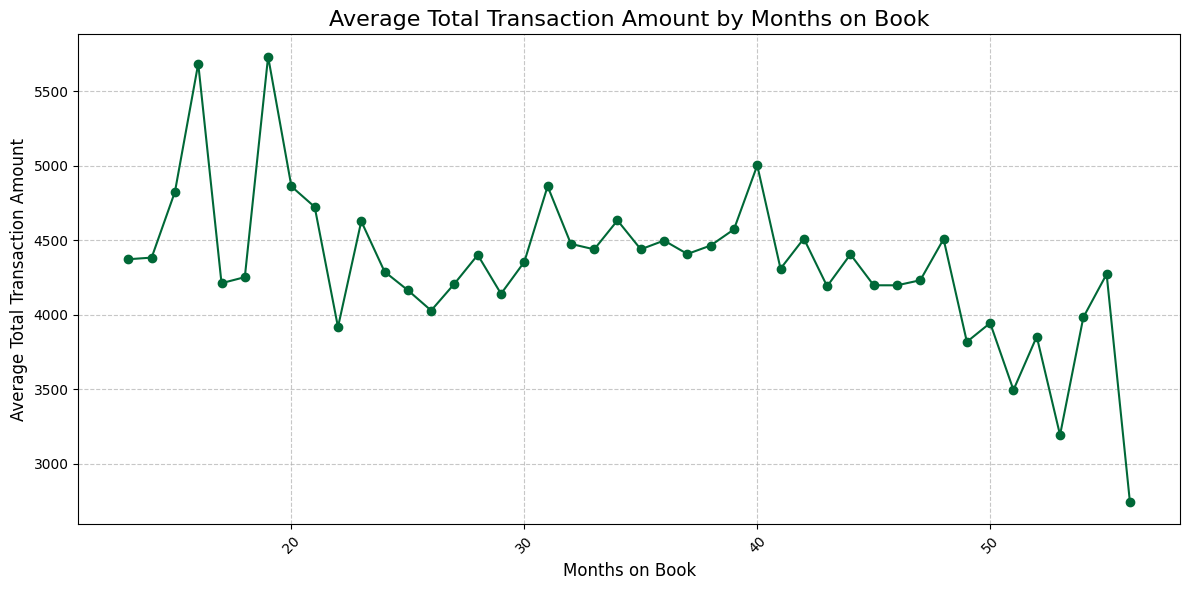

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average total transaction amount per months on book
avg_trans_amt_by_tenure = df.groupby('Months_on_book')['Total_Trans_Amt'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_trans_amt_by_tenure['Months_on_book'], avg_trans_amt_by_tenure['Total_Trans_Amt'], marker='o', color='#006837')
plt.title('Average Total Transaction Amount by Months on Book', fontsize=16)
plt.xlabel('Months on Book', fontsize=12)
plt.ylabel('Average Total Transaction Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

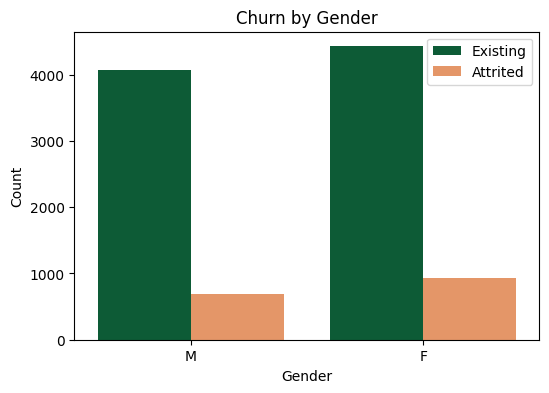

In [ ]:
# Churn by Gender

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Attrition_Flag', palette = ["#006837","#f99153"] )
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(["Existing",'Attrited'])
plt.show()

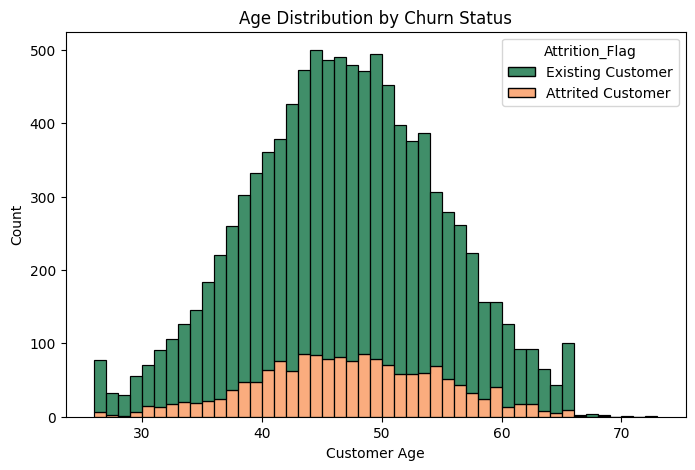

In [ ]:
# Churn by Age Group

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Customer_Age', hue='Attrition_Flag', multiple='stack',
             palette = ["#006837","#f99153"])
plt.title("Age Distribution by Churn Status")
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.show()

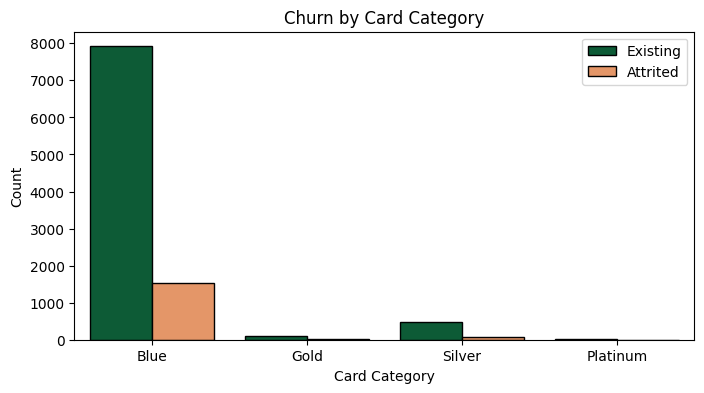

In [ ]:
# Churn by Card category

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag',
              palette = ["#006837","#f99153"], edgecolor='black', linewidth=1)
plt.title("Churn by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.legend(['Existing','Attrited'])
plt.show()

/tmp/ipython-input-1617247144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt', palette=["#006837", "#F99153"])


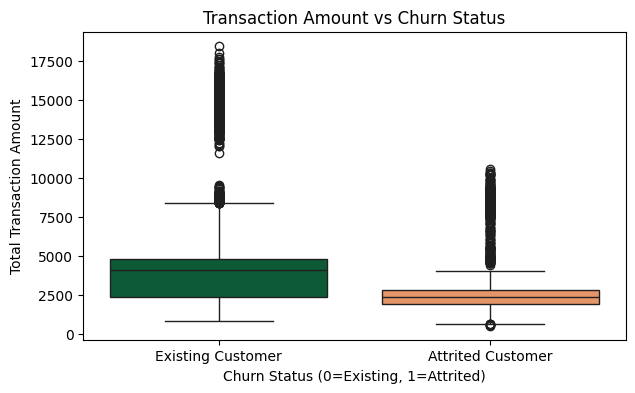

In [ ]:
# Churn vs. Total Transaction Amount

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt', palette=["#006837", "#F99153"])
plt.title("Transaction Amount vs Churn Status")
plt.xlabel("Churn Status (0=Existing, 1=Attrited)")
plt.ylabel("Total Transaction Amount")
plt.show()

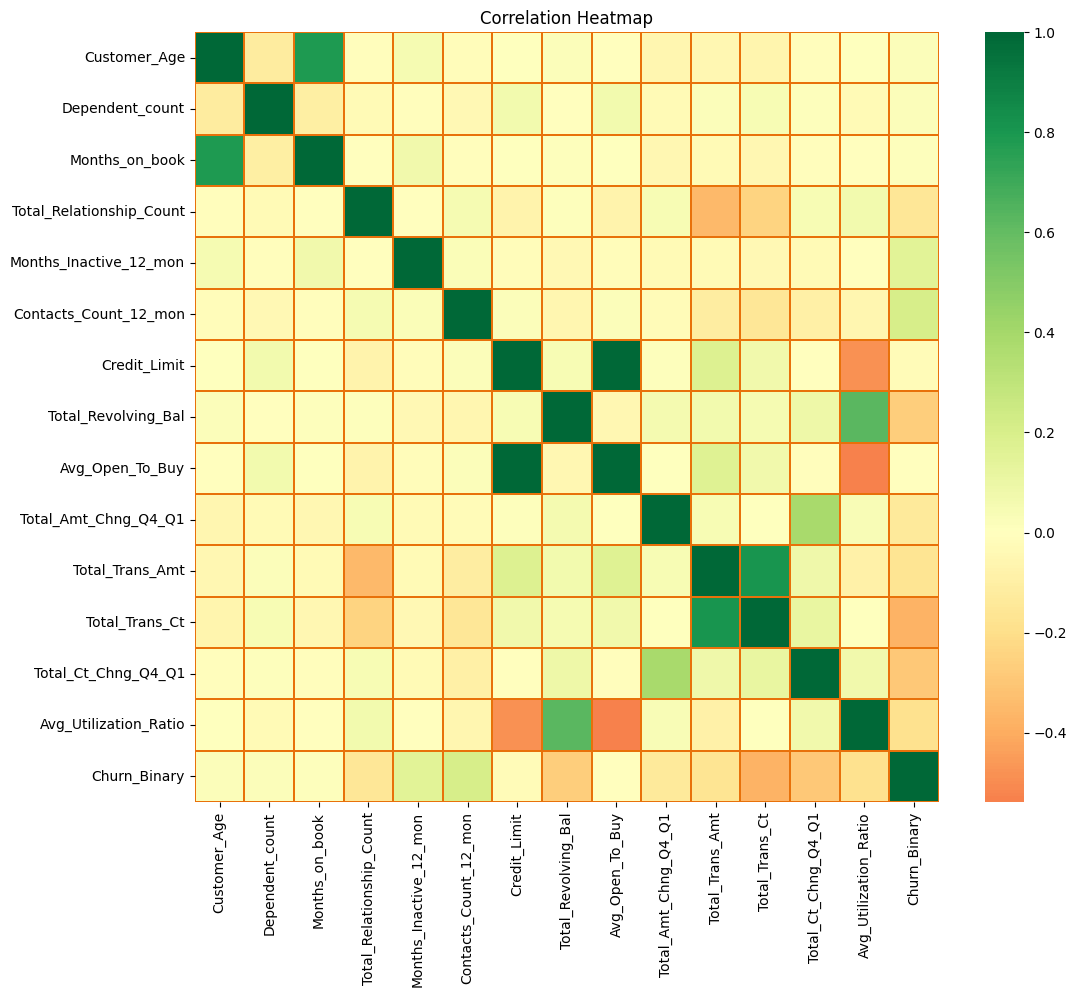

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix (numeric columns only)
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
#sns.heatmap(corr, annot=False, cmap="viridis", center=0)
sns.heatmap(corr, annot=False, cmap="RdYlGn", center=0, linewidths=0.2, linecolor='#E8710A')
plt.title("Correlation Heatmap")
plt.show()


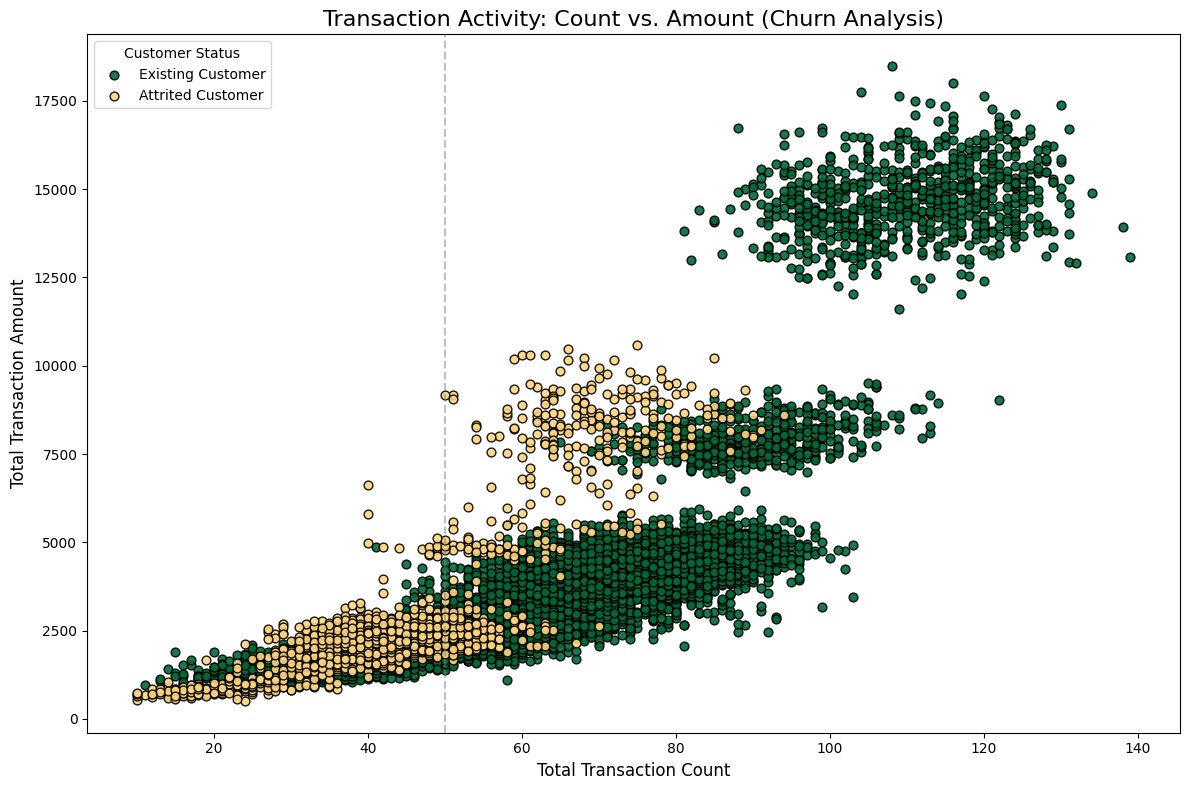

In [ ]:
# Color mapping
color_map = {
    "Existing Customer": "#006837",
    "Attrited Customer": "#FED481"
}

plt.figure(figsize=(12, 8))

# Scatter grouped by churn status
for status in df["Attrition_Flag"].unique():
    subset = df[df["Attrition_Flag"] == status]
    plt.scatter(subset["Total_Trans_Ct"],
        subset["Total_Trans_Amt"],alpha=0.9,
        s=40,label=status,
        color=color_map.get(status, "gray"),
        edgecolor='black', linewidth=1
    )

# Titles & labels
plt.title("Transaction Activity: Count vs. Amount (Churn Analysis)", fontsize=16)
plt.xlabel("Total Transaction Count", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)

# Threshold reference line
plt.axvline(x=50, linestyle="--", color="grey", alpha=0.5)

plt.legend(title="Customer Status")
plt.tight_layout()
plt.show()

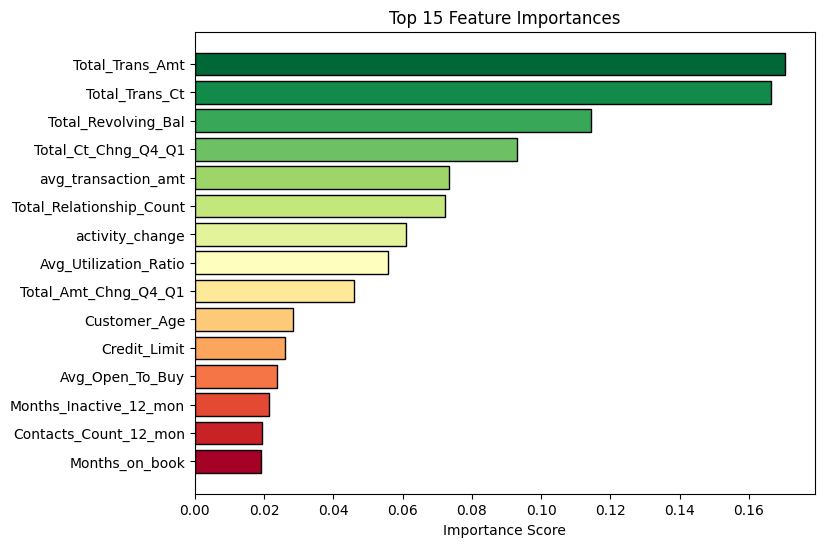

In [ ]:
# Feature Importance Plot (after ML Training)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


# Extract importances
importances = rf.feature_importances_

# Get top 15 features sorted
indices = np.argsort(importances)[-15:]



# 2. Generate a list of colors based on the number of bars (indices)
cmap = plt.get_cmap("RdYlGn")
# np.linspace(0, 1, len(indices)) creates a range from 0% to 100%
colors = cmap(np.linspace(0, 1, len(indices)))

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color=colors, edgecolor='black', linewidth=1)
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


/tmp/ipython-input-1472317858.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette=colors, edgecolor='black', linewidth=1)
/tmp/ipython-input-1472317858.py:25: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette=colors, edgecolor='black', linewidth=1)
/tmp/ipython-input-1472317858.py:25: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette=colors, edgecolor='black', linewidth=1)


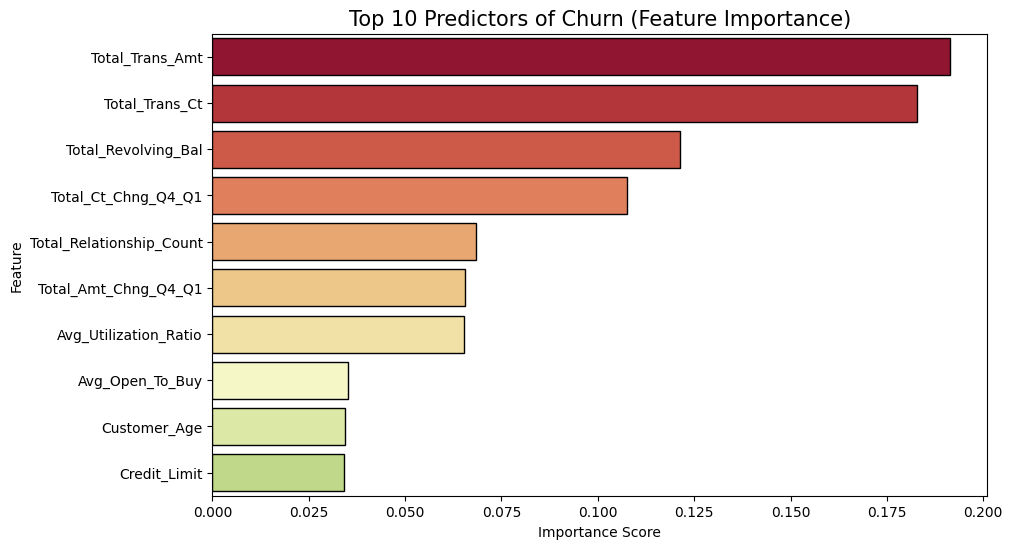

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data for ML
# 1. Select numeric columns only for simplicity (or encode categorical ones)
X = df.select_dtypes(include=['number']).drop(columns=['Churn_Binary'])
y = df['Churn_Binary']

# 2. Train a simple model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# 3. Extract Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 4. Plot it
cmap = plt.get_cmap("RdYlGn")
# np.linspace(0, 1, len(indices)) creates a range from 0% to 100%
colors = cmap(np.linspace(0, 1, len(indices)))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette=colors, edgecolor='black', linewidth=1)
plt.title('Top 10 Predictors of Churn (Feature Importance)', fontsize=15)
plt.xlabel('Importance Score')
plt.show()